<a href="https://colab.research.google.com/github/DonRoboto/Cursos/blob/master/Jorge_Calvillo_Covid19Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo experimental para Covid-19

En este ejercicio obtendrás un modelo de deep learning (redes neuronales) para estimar el número de casos confirmados de Covid-19 a nivel nacional.

Los datos de entrenamiento corresponden al periodo del 27 de febrero al 17 de abril del 2020.

Fuentes:

- https://www.kaggle.com/carloslira/covid19-mexico
- https://github.com/carloscerlira/COVIDMX

In [0]:
import numpy as np                  # Librería para cálculos matemáticos
import pandas as pd                 # Librería para lectura de archivos
import matplotlib.pyplot as plt     # Librería para graficar
# Métodos para machine learning
from keras.models import Sequential # Función para definir modelos Deep Learning de forma sequencial
from keras.layers import Dense      # Función para definir capas de redes totalmente conectadas
from keras import backend           # Función para reestablecer las los modelos de DL  
from keras import optimizers        # Función para definir el optimizador para el entrenamiento

Using TensorFlow backend.


In [0]:
# Lectura de la base de datos
dataset = pd.read_csv('https://raw.githubusercontent.com/carloscerlira/COVIDMX/master/data/time_series_confirmed_MX.csv')

In [0]:
dataset

,Estado,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,AGUASCALIENTES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,6.0,9.0,13.0,19.0,20.0,24.0,31.0,36.0,41.0,43.0,49.0,49.0,49.0,49.0,53.0,53.0,53.0,53.0,55.0,55.0,55.0,65.0,65.0,71.0,77.0
1,BAJA CALIFORNIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,7.0,11.0,12.0,13.0,13.0,17.0,20.0,22.0,26.0,31.0,35.0,36.0,47.0,54.0,60.0,69.0,111.0,136.0,225.0,239.0,258.0,278.0,335.0,368.0,412.0,464.0,505.0,536.0
2,BAJA CALIFORNIA SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,6.0,8.0,9.0,11.0,13.0,17.0,18.0,19.0,20.0,23.0,28.0,54.0,56.0,68.0,68.0,85.0,102.0,120.0,153.0,164.0,165.0,166.0,169.0
3,CAMPECHE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,5.0,5.0,6.0,6.0,8.0,8.0,9.0,14.0,14.0,14.0,15.0,18.0,19.0,29.0,33.0,43.0,45.0,47.0
4,CHIAPAS,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,6.0,6.0,10.0,11.0,12.0,13.0,16.0,17.0,20.0,25.0,26.0,28.0,32.0,34.0,38.0,39.0,43.0,43.0,45.0,48.0,54.0,58.0
5,CHIHUAHUA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,10.0,11.0,12.0,13.0,15.0,22.0,22.0,29.0,42.0,54.0,54.0,61.0,67.0,69.0,83.0,108.0,115.0
6,CIUDAD DE MÉXICO,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,5.0,11.0,17.0,22.0,29.0,29.0,31.0,36.0,39.0,54.0,67.0,70.0,74.0,87.0,94.0,109.0,167.0,195.0,201.0,234.0,288.0,327.0,384.0,459.0,559.0,609.0,723.0,855.0,909.0,1040.0,1117.0,1328.0,1437.0,1556.0,1686.0,1828.0,2080.0
7,COAHUILA,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,12.0,12.0,12.0,13.0,14.0,16.0,33.0,37.0,48.0,56.0,62.0,69.0,73.0,82.0,102.0,109.0,122.0,129.0,143.0,156.0,157.0,176.0,194.0,195.0,214.0,217.0
8,COLIMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,9.0
9,DURANGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,10.0,12.0,12.0,15.0,15.0,16.0,16.0,16.0,16.0,16.0,15.0,16.0,17.0,19.0


In [0]:
# Obtenemos datos nacionales
nacional = dataset.query('Estado == "NACIONAL"')
nacional

,Estado,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
32,NACIONAL,1.0,4.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,8.0,12.0,12.0,26.0,41.0,53.0,82.0,93.0,118.0,164.0,203.0,251.0,316.0,367.0,405.0,475.0,585.0,717.0,848.0,993.0,1094.0,1215.0,1378.0,1510.0,1688.0,1890.0,2142.0,2439.0,2785.0,3181.0,3441.0,3844.0,4219.0,4661.0,5014.0,5399.0,5847.0,6297.0,6875.0


In [0]:
# La varible creada con pandas representa un Dataframe. 
# Para las restantes operaciones es conveniente que los datos sean arreglos de numpy
# Con la propiedad .values obtenemos los datos como arreglos de numpy.
y = nacional.values
print(y)

[['NACIONAL' 1.0 4.0 5.0 5.0 5.0 5.0 5.0 6.0 6.0 7.0 7.0 7.0 8.0 12.0
  12.0 26.0 41.0 53.0 82.0 93.0 118.0 164.0 203.0 251.0 316.0 367.0 405.0
  475.0 585.0 717.0 848.0 993.0 1094.0 1215.0 1378.0 1510.0 1688.0 1890.0
  2142.0 2439.0 2785.0 3181.0 3441.0 3844.0 4219.0 4661.0 5014.0 5399.0
  5847.0 6297.0 6875.0]]


In [0]:
# Removemos la palabra "NACIONAL" del arreglo (ó nos quedamos con el resto)
y = y[0,1:]
print(y)

[1.0 4.0 5.0 5.0 5.0 5.0 5.0 6.0 6.0 7.0 7.0 7.0 8.0 12.0 12.0 26.0 41.0
 53.0 82.0 93.0 118.0 164.0 203.0 251.0 316.0 367.0 405.0 475.0 585.0
 717.0 848.0 993.0 1094.0 1215.0 1378.0 1510.0 1688.0 1890.0 2142.0 2439.0
 2785.0 3181.0 3441.0 3844.0 4219.0 4661.0 5014.0 5399.0 5847.0 6297.0
 6875.0]


In [0]:
# Tamaño de la muestra:
y.shape

(51,)

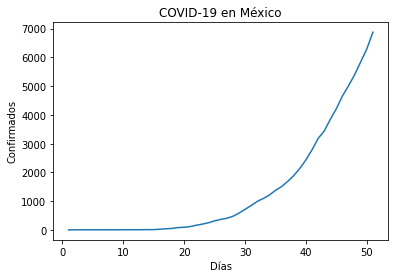

(51,)


In [0]:
# ANÁLISIS EXPLORATORIO DE DATOS

# Construimos un vector que represente el numero del día de cada muestra, 
# comenzando del día 1 hasta el 51 
x = np.linspace(1,51,51)

# Gráfica del numero de confirmados a nivel nacional 
plt.plot(x, y)
plt.title('COVID-19 en México')
plt.xlabel('Días')
plt.ylabel('Confirmados')

plt.show()
print(x.shape)


## Preprocesamiento de los datos

In [0]:
# Normalización del numero de confirmados
y_media = np.mean(y)
y_std = np.std(y)
y = (y - y_media)/y_std
print(y)

[-0.7212201433917452 -0.7196593699555509 -0.7191391121434861
 -0.7191391121434861 -0.7191391121434861 -0.7191391121434861
 -0.7191391121434861 -0.7186188543314214 -0.7186188543314214
 -0.7180985965193567 -0.7180985965193567 -0.7180985965193567
 -0.7175783387072919 -0.7154973074590328 -0.7154973074590328
 -0.7082136980901261 -0.7004098309091545 -0.6941667371643774
 -0.6790792606144992 -0.6733564246817867 -0.6603499793801676
 -0.6364181200251883 -0.6161280653546624 -0.5911556903755536
 -0.5573389325913437 -0.5308057841760406 -0.5110359873175795
 -0.47461794047304584 -0.41738958114592145 -0.3487155499533723
 -0.28056177657288783 -0.20512439382349665 -0.1525783548049552
 -0.08962715954511843 -0.004825136178561453 0.06384889501398776
 0.15645478556151624 0.26154686359859913 0.39265183223892036
 0.547168402422156 0.7271776053965654 0.933199698974213 1.0684667301110524
 1.2781306283731535 1.473227307897441 1.7031812608300678
 1.8868322684889305 2.0871315261338657 2.320207025938881
 2.55432304

In [0]:
x_train = x[:-5]
y_train = y[:-5]
x_test = x[46:]
y_test = y[46:]
print(x_train.shape)
print(x_test.shape)

(46,)
(5,)


## Construcción de la arquitectura de la MLP

In [0]:
# Arquitectura
modelo = Sequential()
modelo.add(Dense(50, use_bias=True, activation='tanh', input_shape=(1,))) 
modelo.add(Dense(25, use_bias=True, activation='tanh')) 
modelo.add(Dense(5, use_bias=True, activation='tanh')) 
modelo.add(Dense(1)) 

In [0]:
# La siguiente línea de código es para mostrar la tabla con las características del modelo
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 1,511
Trainable params: 1,511
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Define el optimizador Adam
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=0, epsilon=1e-8)
# Compila el modelo
modelo.compile(optimizer=adam, loss='mean_squared_error', metrics=['mse'])

In [0]:
# Entrena el modelo
M = modelo.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10000, verbose=0)

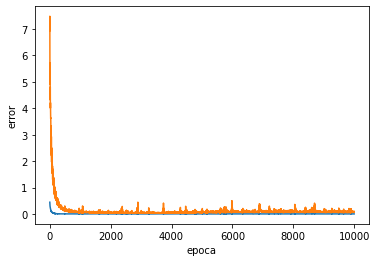

In [0]:
# Grafica de la evolución del error a traves de cada época
plt.plot(M.history['loss'], label = 'error en entrenamiento')
plt.plot(M.history['val_loss'], label = 'error en validacion')
plt.xlabel('epoca')
plt.ylabel('error')
plt.show()

In [0]:
# Prueba del modelo
dia = 50
dia_arreglo = np.array([dia])
prediccion_previa = modelo.predict(dia_arreglo)
# Proceso inverso a la normalización
prediccion = (prediccion_previa * y_std) + y_media
valor_real = (y[dia] * y_std) + y_media
print(prediccion, valor_real)

[[5662.289]] 6875.0


In [0]:
# Predicciones sobre todos los datos
predicciones = modelo.predict(x)

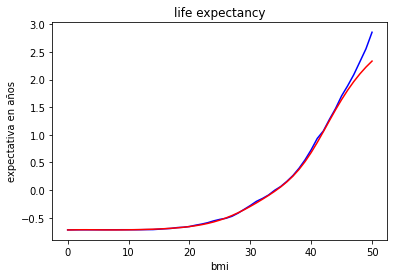

In [0]:
# Visualización de los resultados
plt.plot(y, color='blue')  # Esta gráfica muestra los datos que se obtienen con el modelo
plt.plot(predicciones, color='red')  # Esta gráfica muestra los datos que se obtienen con el modelo
plt.title('life expectancy')
plt.ylabel('expectativa en años')
plt.xlabel('bmi')
plt.show()

In [0]:
# Score del modelo
from sklearn.metrics import r2_score

In [0]:
#print(predicciones.shape)
r2_modelo = r2_score(y, predicciones)
print('El score del modelo es: ',r2_modelo)

El score del modelo es:  0.9907948841233509


In [0]:
# Prediciones en un periodo de tiempo
espacio = np.linspace(1,101, 100)
predicciones = modelo.predict(espacio)
predicciones_rango_original = (predicciones * y_std) + y_media
valores_reales_rango_original = (y * y_std) + y_media

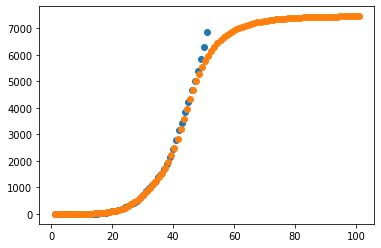

In [0]:
plt.scatter(x, valores_reales_rango_original)
plt.scatter(espacio, predicciones_rango_original)
#plt.xlim([29,30])
plt.show()